In [107]:
import numpy as np, matplotlib.pyplot as plt
import cvxpy

# import cvxopt  # for GLPK_MI solver. pip install cvxopt
# import scip    # for SCIP solver.    pip install pyscipopt

## Solving linear equations

In [108]:
# A child buys ticket for 1.5 shekels. 
# An adult buys ticket for 4 shekels. 
# The total number of people is 2200.
# The total amount collected is 5050 shekels.
# How many children and how many adults bought tickets?
children = cvxpy.Variable()
adults   = cvxpy.Variable()
constraints = [
    1*children + 1*adults   == 2200,
    1.5*children + 4*adults == 5050
]
prob = cvxpy.Problem(cvxpy.Minimize(0), constraints)
prob.solve() 
print(f'children = {children.value}, adults = {adults.value}')
print(f'Integer: children = {int(np.round(children.value))}, adults = {int(np.round(adults.value))}')

children = 1500.0, adults = 700.0000000000001
Integer: children = 1500, adults = 700


## Solving optimization problems with constraints

In [44]:
# Create two scalar optimization variables.
x = cvxpy.Variable()
y = cvxpy.Variable()

# Form objective.
objective = cvxpy.Minimize((x - y)**2)

# Create constraints.
constraints = [x + y == 5,
               1 <= x, x <= 3, 
               y >= 1, 3 >= y,
               x >= y] 
# Note: constraints can only use ==, >=, <=.  The other operators are not allowed.

# Form and solve problem.
prob = cvxpy.Problem(objective, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print(f"optimal var: x = {x.value} , y = {y.value}")

status: optimal
optimal value 0.0
optimal var: x = 2.5 , y = 2.5


In [54]:
# Rounding:

# Form objective.
objective = cvxpy.Minimize((x - y)**4)

# Create constraints.
constraints = [x + y == 5,
               1 <= x, x <= 3, 
               y >= 1, 3 >= y,
               x >= y] 
# Note: constraints can only use ==, >=, <=.  The other operators are not allowed.

# Form and solve problem.
prob = cvxpy.Problem(objective, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("Rounded optimal value", np.round(prob.value,1))
print(f"optimal variables: x = {x.value} , y = {y.value}")
print(f"Rounded optimal variables: x = {np.round(x.value,2)} , y = {np.round(y.value,2)}")

status: optimal
optimal value 2.5898990106089147e-10
Rounded optimal value 0.0
optimal variables: x = 2.5020058142472323 , y = 2.4979941857527677
Rounded optimal variables: x = 2.5 , y = 2.5


## Infeasible problem

In [55]:
x = cvxpy.Variable()
y = cvxpy.Variable()

# An infeasible problem.
constraints = [x + y == 4,
               1 <= x, x <= 3, 
               y >= 5, 7 >= y] 
prob = cvxpy.Problem(cvxpy.Minimize(x), constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)  # value is irrelevant for infeasible programs


status: infeasible
optimal value inf


## Unbounded problem

In [56]:

prob = cvxpy.Problem(cvxpy.Minimize(x), constraints=[x <= 1])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

status: unbounded
optimal value -inf


## Integer programs

In [57]:
# Create two scalar optimization variables.
x = cvxpy.Variable(integer=True)
y = cvxpy.Variable(integer=True)

# Form objective.
objective = cvxpy.Minimize((x - y)**2)
# objective = cvxpy.Minimize((x - y))

# Create constraints.
constraints = [x + y == 5,
               1 <= x, x <= 3, 
               y >= 1, 3 >= y,
               x >= y]
# Note: constraints can only use ==, >=, <=.  The other operators are not allowed.

# Form and solve problem.
prob_1 = cvxpy.Problem(objective, constraints)
prob_1.solve()
print("status:", prob_1.status)
print("optimal value", prob_1.value)
print(f"optimal var: x = {x.value} , y = {y.value} ")

status: optimal
optimal value 1.0
optimal var: x = 3.0 , y = 2.0 


## Different solvers

cvxpy supports [many different solvers](https://www.cvxpy.org/tutorial/solvers/index.html).

In [66]:
x = cvxpy.Variable()
y = cvxpy.Variable()
constraints = [x + y == 5,
               1 <= x, x <= 3, 
               y >= 1, 3 >= y,
               x >= y]
prob = cvxpy.Problem(cvxpy.Minimize((x - y)**2), constraints)
prob.solve(verbose=True)  
print("status:", prob.status)
print("optimal value", prob.value)
print(f"optimal var: x = {x.value} , y = {y.value}")

                                     CVXPY                                     
                                     v1.6.4                                    
(CVXPY) Mar 26 09:14:30 PM: Your problem has 2 variables, 6 constraints, and 0 parameters.
(CVXPY) Mar 26 09:14:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 26 09:14:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 26 09:14:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 26 09:14:30 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 26 09:14:30 PM: Compiling problem (target solver=OSQP).
(CVXP

In [68]:
# Try a different solver:
prob.solve(solver=cvxpy.CLARABEL, verbose=True)  
print("status:", prob.status)
print("optimal value", prob.value)
print(f"optimal var: x = {x.value} , y = {y.value}")

                                     CVXPY                                     
                                     v1.6.4                                    
(CVXPY) Mar 26 09:15:41 PM: Your problem has 2 variables, 6 constraints, and 0 parameters.
(CVXPY) Mar 26 09:15:41 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 26 09:15:41 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 26 09:15:41 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 26 09:15:41 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 26 09:15:41 PM: Using cached ASA map, for faster compilation 

In [69]:
prob = cvxpy.Problem(cvxpy.Minimize((x - y)**4), constraints)
prob.solve(verbose=True)  
print("status:", prob.status)
print("optimal value", prob.value)
print(f"optimal var: x = {x.value} , y = {y.value}")

                                     CVXPY                                     
                                     v1.6.4                                    
(CVXPY) Mar 26 09:15:59 PM: Your problem has 2 variables, 6 constraints, and 0 parameters.
(CVXPY) Mar 26 09:15:59 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 26 09:15:59 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 26 09:15:59 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 26 09:15:59 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 26 09:15:59 PM: Compiling problem (target solver=CLARABEL).
(

In [70]:
prob = cvxpy.Problem(cvxpy.Minimize((x - y)**4), constraints)
prob.solve(solver=cvxpy.OSQP, verbose=True)  
print("status:", prob.status)
print("optimal value", prob.value)
print(f"optimal var: x = {x.value} , y = {y.value}")

                                     CVXPY                                     
                                     v1.6.4                                    
(CVXPY) Mar 26 09:16:19 PM: Your problem has 2 variables, 6 constraints, and 0 parameters.
(CVXPY) Mar 26 09:16:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 26 09:16:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 26 09:16:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 26 09:16:19 PM: Your problem is compiled with the CPP canonicalization backend.


SolverError: Problem could not be reduced to a QP, and no conic solvers exist among candidate solvers ({'qp_solvers': ['OSQP'], 'conic_solvers': []}).

In [71]:
prob = cvxpy.Problem(cvxpy.Minimize((x - y)**4), constraints)
prob.solve(solver_path=[cvxpy.OSQP,cvxpy.CLARABEL], verbose=True)  
print("status:", prob.status)
print("optimal value", prob.value)
print(f"optimal var: x = {x.value} , y = {y.value}")

                                     CVXPY                                     
                                     v1.6.4                                    
(CVXPY) Mar 26 09:17:14 PM: Your problem has 2 variables, 6 constraints, and 0 parameters.
(CVXPY) Mar 26 09:17:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 26 09:17:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 26 09:17:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 26 09:17:14 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Mar 26 09:17:14 PM: Solver OSQP failed: Problem could not be reduced to a QP, and no conic solvers exist among candidate solvers ({'qp_solvers': ['OSQP'], 'conic_solvers': []}).
                                     CVXPY                                     
                                     v1.6.4    

## Convex and concave

In [72]:
# We can only maximize a concave function, or minimize a convex function, but not vice versa!

prob = cvxpy.Problem(cvxpy.Maximize(x**2), constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP, even though each sub-expression is.
You are trying to maximize a function that is convex.

In [12]:
# A scalar variable.
a = cvxpy.Variable()

# Vector variable with shape (5,).
x = cvxpy.Variable(5)

# Matrix variable with shape (4, 7).
A = cvxpy.Variable((4, 7))

## Implementing optimization problems from papers

From [Aziz Moulin and Sandomirsiky (2020), A polynomial-time algorithm for computing a Pareto optimal and almost proportional allocation](https://www.sciencedirect.com/science/article/pii/S0167637720301024)

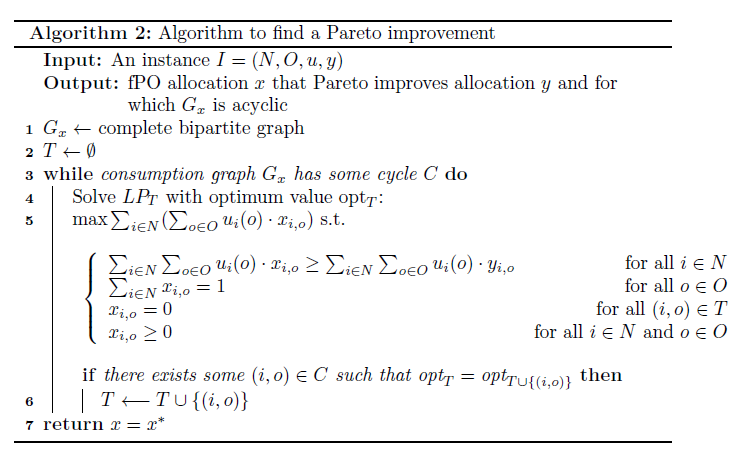

**Question 1**: what are the variables for optimization?

In [ ]:
N = range(5)   # INPUT EXAMPLE
O = range(4)   # INPUT EXAMPLE
x = cvxpy.Variable((len(N), len(O)))

**Question 2**: What is the objective?

In [89]:
u = np.random.randint(1,100, (len(N), len(O)))  # INPUT EXAMPLE
print("u = \n",u)
objective = cvxpy.Maximize(
    sum(sum(u[i,o]*x[i,o] for o in O) for i in N)
)

u = 
 [[47 83 38 57]
 [73 82 43 46]
 [53  3 86 78]
 [ 7 12 15 76]
 [77 37 75 86]]


**Question 3**: What are the constraints?

In [85]:
constraints_2 = [(sum(x[i,o] for i in N)==1) for o in O]
print(len(constraints_2))

4


In [86]:
T = [(0,1),(4,2)]   # INPUT EXAMPLE
constraints_3 = [x[i,o]==0 for (i,o) in T]
print(len(constraints_3))

2


In [87]:
constraints_4 = [x[i,o]>=0 for i in N for o in O]
print(len(constraints_4))

20


In [ ]:
# INPUT EXAMPLE:
y = np.random.random((len(N), len(O)))
print("y = \n",y.round(2), "sum = ", np.sum(y, axis=0))
y = y / np.sum(y, axis=0)  # Normalize to sum 1
print("y = \n",y.round(2), "sum = ", np.sum(y, axis=0))

constraints_1 = [(sum(u[i,o]*x[i,o] for o in O) >= 
                  sum(u[i,o]*y[i,o] for o in O)) 
                  for i in N]
print(len(constraints_1))

y = 
 [[0.99 0.75 0.78 0.73]
 [0.31 0.64 0.31 0.71]
 [0.92 0.68 0.95 0.03]
 [0.63 0.66 0.34 0.96]
 [0.16 0.54 0.53 0.01]] sum =  [3.01050169 3.26496798 2.90517163 2.44776901]
y = 
 [[0.33 0.23 0.27 0.3 ]
 [0.1  0.2  0.11 0.29]
 [0.31 0.21 0.33 0.01]
 [0.21 0.2  0.12 0.39]
 [0.05 0.16 0.18 0.  ]] sum =  [1. 1. 1. 1.]
5


In [102]:
LP_T = cvxpy.Problem(
    objective = objective, 
    constraints = constraints_1 + constraints_2 + constraints_3 + constraints_4
    )
LP_T.solve()
print("status = ",LP_T.status)
opt_T = LP_T.value
print("opt_T = ", opt_T)


status =  optimal
opt_T =  290.80955202991686


In [106]:
def find_opt_T(N, O, u, y, T):
    x = cvxpy.Variable((len(N), len(O)))    
    objective = cvxpy.Maximize(
        sum(sum(u[i,o]*x[i,o] for o in O) for i in N)
    )
    constraints_1 = [(sum(u[i,o]*x[i,o] for o in O) >= sum(u[i,o]*y[i,o] for o in O)) for i in N]
    constraints_2 = [(sum(x[i,o] for i in N)==1) for o in O]
    constraints_3 = [x[i,o]==0 for (i,o) in T]
    constraints_4 = [x[i,o]>=0 for i in N for o in O]
    LP_T = cvxpy.Problem(
        objective = objective, 
        constraints = constraints_1 + constraints_2 + constraints_3 + constraints_4
        )
    LP_T.solve()
    if LP_T.status!="optimal":
        raise ValueError("LP_T status is " + LP_T.status)
    opt_T = LP_T.value
    return opt_T

T = [(0,1),(4,2)]   # INPUT EXAMPLE
C = [(1,2),(2,3),(3,1)]   # INPUT EXAMPLE

opt_T = find_opt_T(N, O, u, y, T)
print("opt_T = ",opt_T)
for (i,o) in C:
    Tio = T + [(i,o)]
    opt_Tio = find_opt_T(N, O, u, y, Tio)
    print(f"opt_T({i},{o}) = ",opt_Tio)
    # if opt_T == opt_Tio:
    if np.allclose(opt_T,opt_Tio):
        print(f"Adding ({i},{o})")
        T = Tio

opt_T =  290.80955202991686
opt_T(1,2) =  290.80955218767787
Adding (1,2)
opt_T(2,3) =  290.809551550767
Adding (2,3)
opt_T(3,1) =  290.8095515473495
Adding (3,1)
